In [1]:
import pandas as pd
import geopandas as gd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sn

In [2]:
os.chdir('/projects/canis/eoc_feature_corr')

In [3]:
grid_path = "./data/by_state/ME/me_extent_coverage.shp"
grid = gd.read_file(grid_path)
grid = grid.set_index('id')

In [4]:
feature_path = './data/by_state/ME/urban/tl_2018_23_tabblock10.shp'
feature = gd.read_file(feature_path).to_crs(grid.crs)
feature = feature.set_index('GEOID10')
feature = gd.clip(feature, grid)

In [5]:
grid['centroid'] = grid['geometry'].centroid
grid = grid.set_geometry('centroid')
grid['UR10'] = gd.sjoin(grid, feature, how="left", op="within")['UR10']
grid = grid.set_geometry('geometry')
grid = grid.drop('centroid', axis=1)
grid

,left,top,right,bottom,med_rxpwr,chg_covera,verizon_co,geometry,UR10
id,,,,,,,,,
462.0,-7.855368e+06,5.525930e+06,-7.854368e+06,5.524930e+06,-96.055,1,1,"POLYGON ((-7855367.514 5525929.661, -7854367.5...",R
463.0,-7.855368e+06,5.524930e+06,-7.854368e+06,5.523930e+06,-102.590,1,1,"POLYGON ((-7855367.514 5524929.661, -7854367.5...",R
464.0,-7.855368e+06,5.523930e+06,-7.854368e+06,5.522930e+06,-99.260,1,1,"POLYGON ((-7855367.514 5523929.661, -7854367.5...",R
467.0,-7.855368e+06,5.520930e+06,-7.854368e+06,5.519930e+06,-84.250,1,1,"POLYGON ((-7855367.514 5520929.661, -7854367.5...",R
1001.0,-7.854368e+06,5.523930e+06,-7.853368e+06,5.522930e+06,-95.550,1,1,"POLYGON ((-7854367.514 5523929.661, -7853367.5...",R
...,...,...,...,...,...,...,...,...,...
206582.0,-7.471368e+06,5.613930e+06,-7.470368e+06,5.612930e+06,-120.540,0,0,"POLYGON ((-7471367.514 5613929.661, -7470367.5...",R
207118.0,-7.470368e+06,5.614930e+06,-7.469368e+06,5.613930e+06,-117.160,0,0,"POLYGON ((-7470367.514 5614929.661, -7469367.5...",R
207119.0,-7.470368e+06,5.613930e+06,-7.469368e+06,5.612930e+06,-123.710,0,0,"POLYGON ((-7470367.514 5613929.661, -7469367.5...",R


In [6]:
grid['agreement'] = grid['chg_covera'] == grid['verizon_co']

In [7]:
grid['urban'] = grid['UR10'].map({'U': True, 'R': False})

In [8]:
grid[grid['UR10'] == 'R']

,left,top,right,bottom,med_rxpwr,chg_covera,verizon_co,geometry,UR10,agreement,urban
id,,,,,,,,,,,
462.0,-7.855368e+06,5.525930e+06,-7.854368e+06,5.524930e+06,-96.055,1,1,"POLYGON ((-7855367.514 5525929.661, -7854367.5...",R,True,False
463.0,-7.855368e+06,5.524930e+06,-7.854368e+06,5.523930e+06,-102.590,1,1,"POLYGON ((-7855367.514 5524929.661, -7854367.5...",R,True,False
464.0,-7.855368e+06,5.523930e+06,-7.854368e+06,5.522930e+06,-99.260,1,1,"POLYGON ((-7855367.514 5523929.661, -7854367.5...",R,True,False
467.0,-7.855368e+06,5.520930e+06,-7.854368e+06,5.519930e+06,-84.250,1,1,"POLYGON ((-7855367.514 5520929.661, -7854367.5...",R,True,False
1001.0,-7.854368e+06,5.523930e+06,-7.853368e+06,5.522930e+06,-95.550,1,1,"POLYGON ((-7854367.514 5523929.661, -7853367.5...",R,True,False
...,...,...,...,...,...,...,...,...,...,...,...
206582.0,-7.471368e+06,5.613930e+06,-7.470368e+06,5.612930e+06,-120.540,0,0,"POLYGON ((-7471367.514 5613929.661, -7470367.5...",R,True,False
207118.0,-7.470368e+06,5.614930e+06,-7.469368e+06,5.613930e+06,-117.160,0,0,"POLYGON ((-7470367.514 5614929.661, -7469367.5...",R,True,False
207119.0,-7.470368e+06,5.613930e+06,-7.469368e+06,5.612930e+06,-123.710,0,0,"POLYGON ((-7470367.514 5613929.661, -7469367.5...",R,True,False


In [9]:
sn.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [10]:
confusion_matrix = pd.crosstab(grid['agreement'], grid['urban'], rownames=['Agreement'], colnames=['Urban'])
confusion_matrix['Total'] = grid.groupby('urban').count()['agreement']
print (confusion_matrix)

Urban      False  True  Total
Agreement                    
False       5173    15   9061
True        3888    52     67


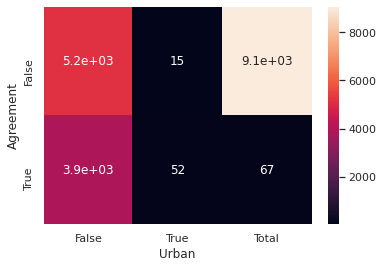

In [11]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [12]:
confusion_matrix = pd.crosstab(grid['urban'], grid['agreement'], colnames=['Agreement'], rownames=['Urban'], normalize='index')
confusion_matrix['Total'] = grid.groupby('urban').count()['agreement']
print (confusion_matrix)

Agreement     False      True  Total
Urban                               
False      0.570908  0.429092   9061
True       0.223881  0.776119     67


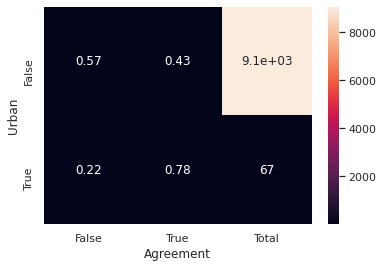

In [13]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()